Importing the dependencies

In [61]:
# https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Analysis

In [62]:
big_mart_data = pd.read_csv('Trains.csv')

In [63]:
big_mart_data.shape

(8523, 12)

In [64]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [65]:
# Getting some info
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


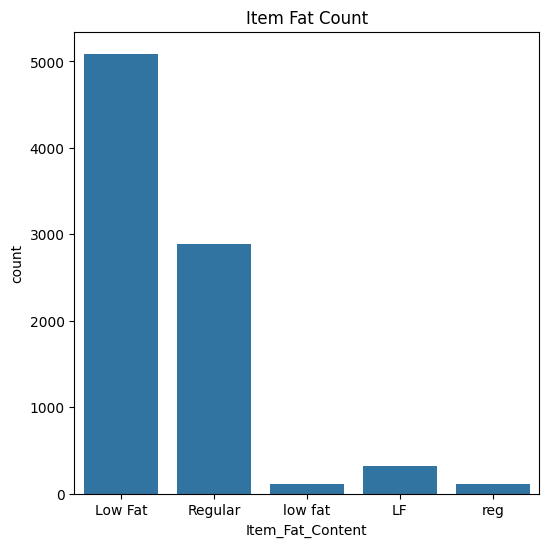

In [66]:
plt.figure(figsize= (6, 6))
sns.countplot(x= 'Item_Fat_Content', data= big_mart_data)
plt.title("Item Fat Count")
plt.show()

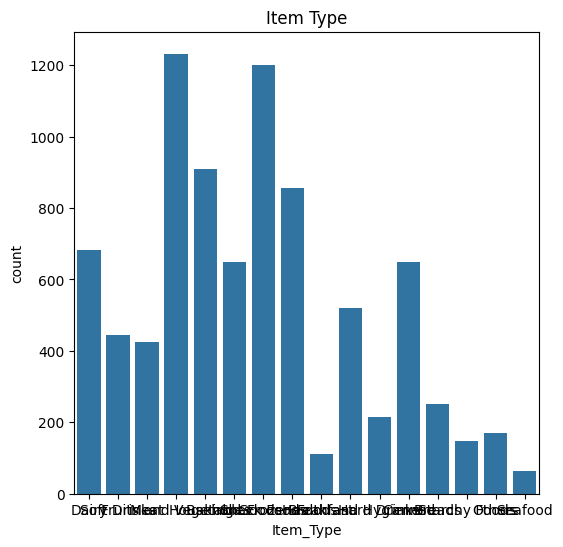

In [67]:
plt.figure(figsize= (6, 6))
sns.countplot(x= 'Item_Type', data= big_mart_data)
plt.title("Item Type")
plt.show()

Categorical Features
- Item Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [68]:
# Checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing values

Mean - Average Value

Mode - Most Repeated Value

In [69]:
# Mean value of the 'Item_Weight' column
big_mart_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [70]:
# Filling the missing values in 'Item_Weight' column with Mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace= True)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_5916\1226936054.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace= True)


In [71]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [72]:
# Replacing the missing values in the "Outlet_Size" with mode
mode_of_outlet_Size = big_mart_data.pivot_table(values= 'Outlet_Size', columns= 'Outlet_Type', aggfunc= (lambda x : x.mode()[0]))

In [73]:
print(mode_of_outlet_Size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [74]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [75]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [76]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x : mode_of_outlet_Size)

In [77]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [78]:
# Statistical measures
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_5916\1469781336.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


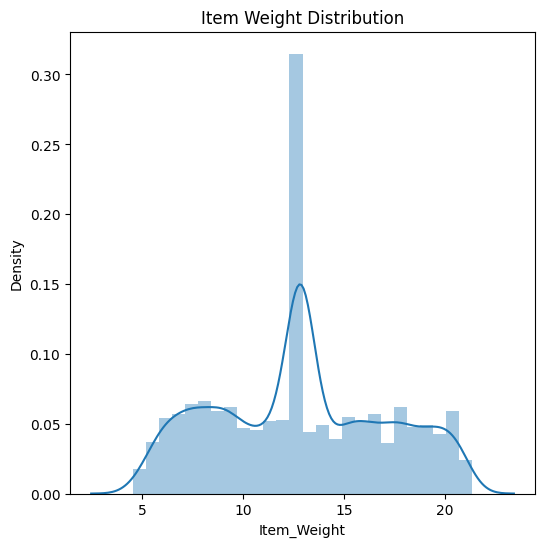

In [79]:
# Item_Weight distribution
plt.figure(figsize= (6, 6))
sns.distplot(big_mart_data['Item_Weight'])
plt.title("Item Weight Distribution")
plt.show()

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_5916\2414025035.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


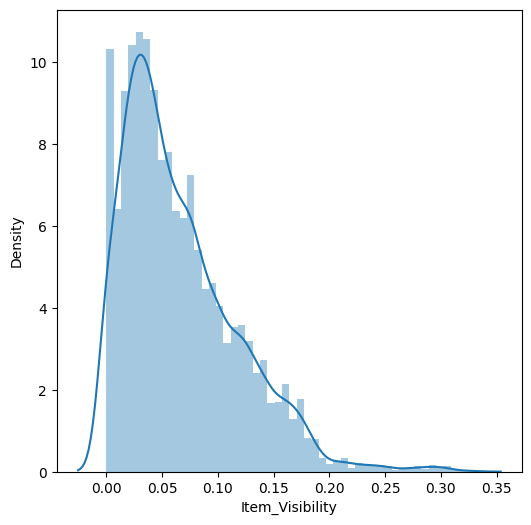

In [80]:
# Item_Visibility distribution
plt.figure(figsize= (6, 6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_5916\1694912348.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


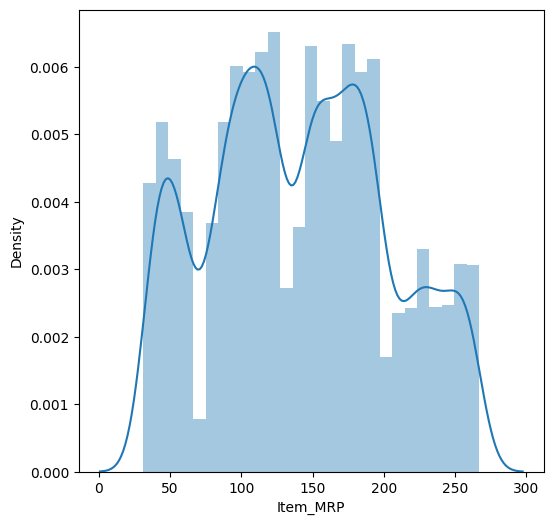

In [81]:
# Item_MRP distribution
plt.figure(figsize= (6, 6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_5916\2249391658.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


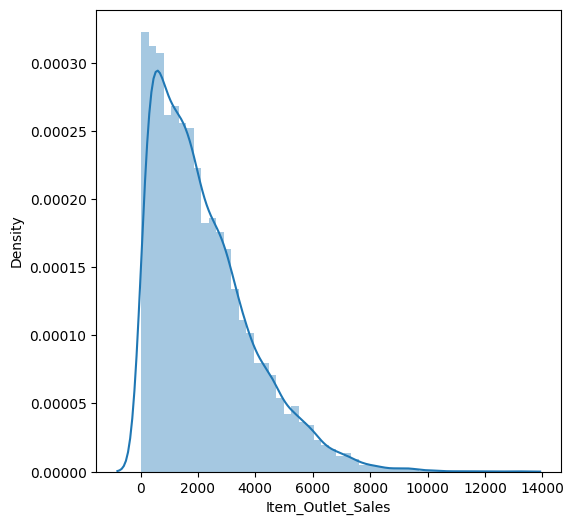

In [82]:
# Item_Outlet_Sales distribution
plt.figure(figsize= (6, 6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

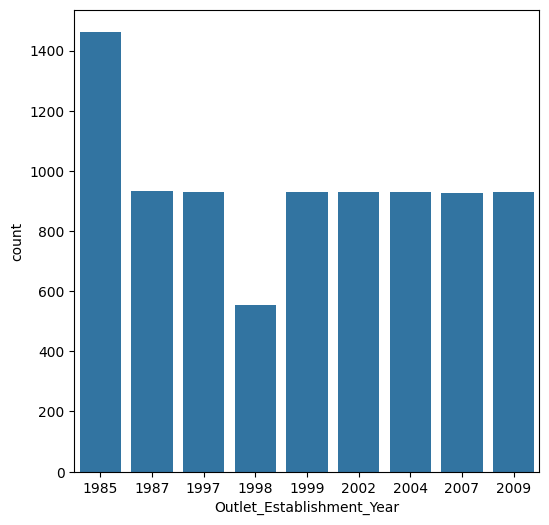

In [83]:
# Outlet_Establishment_Year column
plt.figure(figsize= (6, 6))
sns.countplot(x= 'Outlet_Establishment_Year', data= big_mart_data)
plt.show()

In [84]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features

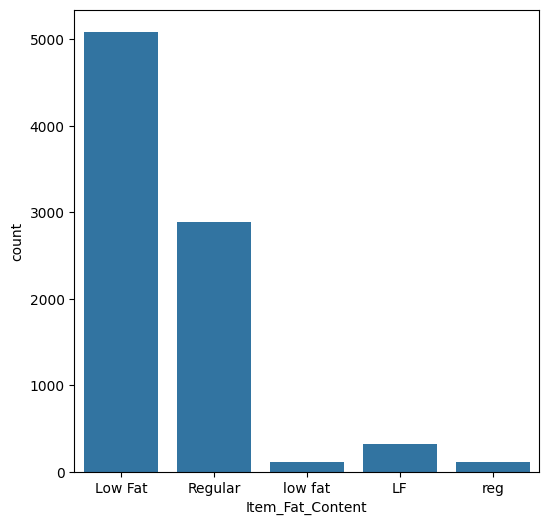

In [85]:
# Item_Fat_Content column
plt.figure(figsize= (6, 6))
sns.countplot(x= 'Item_Fat_Content', data= big_mart_data)
plt.show() 

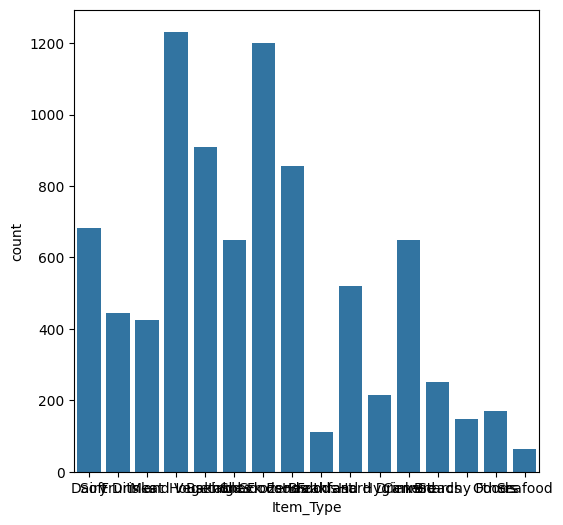

In [86]:
# Item_Type column
plt.figure(figsize= (6, 6))
sns.countplot(x= 'Item_Type', data= big_mart_data)
plt.show() 

Data Preprocessing

In [87]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [88]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [89]:
big_mart_data.replace({"Item_Fat_Content" : {"Low Fat" : "low fat", "LF" : "low fat", "reg" : "Regular"}}, inplace= True)

In [90]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
low fat    5517
Regular    3006
Name: count, dtype: int64

In [91]:
big_mart_data['Outlet_Size'].value_counts()

Outlet_Size
Medium                                                                                                                                                                                                2793
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium      2410
Small                                                                                                                                                                                                 2388
High                                                                                                                                                                                                   932
Name: count, dtype: int64

Label Encoding

Categorical Features
- Item Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Location_Type
- Outlet_Type


In [92]:
encoder = LabelEncoder()

In [93]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data["Item_Identifier"])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data["Item_Fat_Content"])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data["Item_Type"])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data["Outlet_Identifier"])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data["Outlet_Location_Type"])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data["Outlet_Type"])

In [94]:
big_mart_data.drop(columns= 'Outlet_Size', axis= 1, inplace= True)

In [95]:
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,0,1,3735.1380
1,8,5.920,0,0.019278,14,48.2692,3,2009,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,0,1,2097.2700
3,1121,19.200,0,0.000000,6,182.0950,0,1998,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,2,1,2778.3834
8519,897,8.380,0,0.046982,0,108.1570,7,2002,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,1,1,1193.1136
8521,681,7.210,0,0.145221,13,103.1332,3,2009,2,2,1845.5976


Splitting features and the label

In [96]:
X = big_mart_data.drop(columns= 'Item_Outlet_Sales', axis= 1)
Y = big_mart_data['Item_Outlet_Sales']

Train Test Split

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

Model Training

**XGBRegressor**

In [98]:
regressor = XGBRegressor()

In [99]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [100]:
# Training data prediction
training_data_prediction = regressor.predict(X_train)

In [101]:
# R SQUARED ERROR
r_score = metrics.r2_score(Y_train, training_data_prediction)

In [102]:
print("R SQUARED VALUE:",r_score)

R SQUARED VALUE: 0.874185623422072


In [103]:
# Test data prediction
test_data_prediction = regressor.predict(X_test)


In [104]:
# R SQUARED ERROR
r_score_test = metrics.r2_score(Y_test, test_data_prediction)

In [105]:
print("R SQUARED VALUE", r_score_test)

R SQUARED VALUE 0.4934005358588578


In [106]:
mean_absolute = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [107]:
mean_absolute

881.1006932670734

Predictive System

In [108]:
input_data = (156, 9.300, 1, 0.016047, 4, 9, 1999, 0, 1, 3735.1380)

inp_to_array = np.asarray(input_data)

reshaped_inp = inp_to_array.reshape(1, -1)

prediction = regressor.predict(reshaped_inp)
print(prediction)

[852.1988]
